$\textbf{PROGRAMMING ASSIGNMENT - LECTURE 8}$
---

Data: https://archive.ics.uci.edu.

Instructions:
1. Choose a dataset from https://archive.ics.uci.edu/datasets.
2. Your dataset should be unique to that of your classmate, so be sure to discuss with them, otherwise no points will be given into this assignment.
3. Make use of what you learn in Decision tree

---
## Dataset: Facebook Live Sellers in Thailand

In [18]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.tree import plot_tree


Access Dataset

In [19]:
df = pd.DataFrame(pd.read_csv('Datasets/Live_20210128.csv'))
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [20]:
features = ["num_reactions", "num_comments", "num_shares", "num_likes", "num_loves", "num_wows"]
target = "status_type"  # Assuming this as the target variable

df_selected = df.loc[:, features].copy()
df_selected["Y"] = df[target].astype('category').cat.codes  # Convert target to categorical codes

df_selected.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,Y
0,529,512,262,432,92,3,3
1,150,0,0,150,0,0,1
2,227,236,57,204,21,1,3
3,111,0,0,111,0,0,1
4,213,0,0,204,9,0,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

In [22]:
df.isna().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [23]:
df = df.dropna()

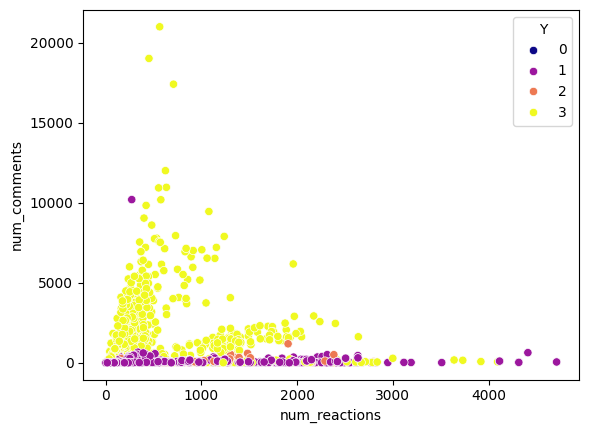

In [24]:
sns.scatterplot(x='num_reactions', y='num_comments', data=df_selected, hue='Y', palette='plasma')
plt.show()

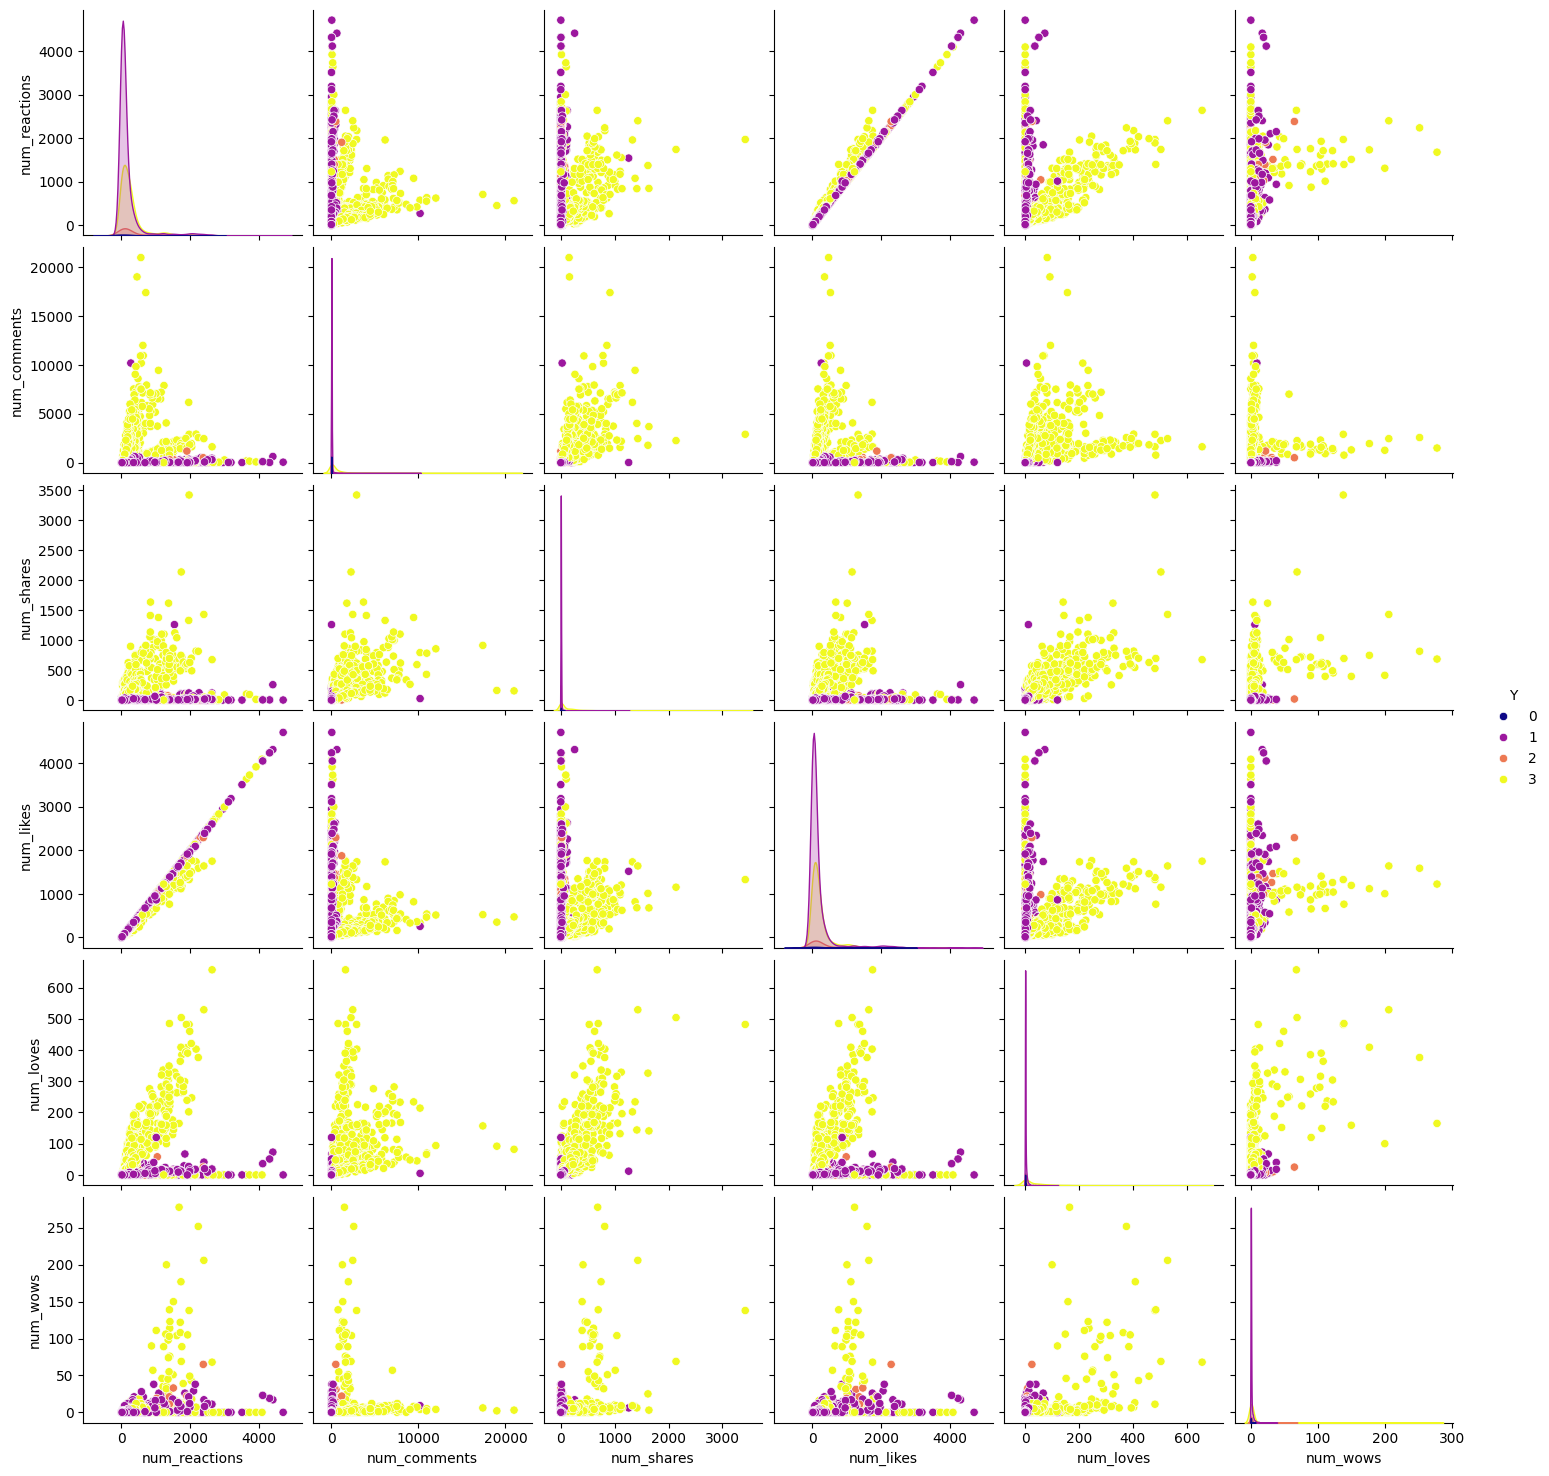

In [25]:
sns.pairplot(df_selected, hue='Y', palette='plasma')
plt.show()

In [26]:
X = df_selected[features]
y = df_selected["Y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [27]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
base_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, base_pred)
accuracy

0.7536643026004728

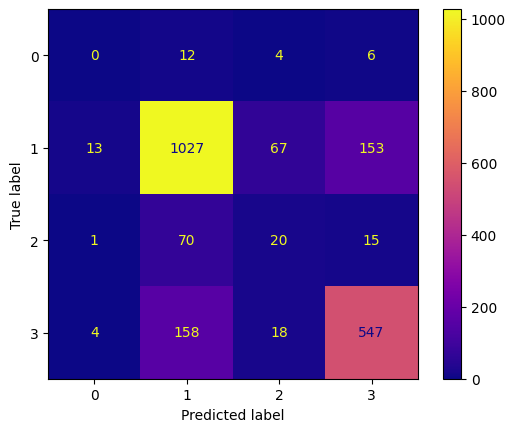

In [28]:
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

cmd.plot(cmap='plasma')
plt.show()

report = classification_report(y_test, y_pred)


In [29]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.81      0.82      0.81      1260
           2       0.18      0.19      0.19       106
           3       0.76      0.75      0.76       727

    accuracy                           0.75      2115
   macro avg       0.44      0.44      0.44      2115
weighted avg       0.75      0.75      0.75      2115



In [30]:
model.feature_importances_

array([0.11420122, 0.14156665, 0.38547997, 0.22000802, 0.09746625,
       0.0412779 ])

In [31]:
feature_importances_df = pd.DataFrame(index=X.columns, 
                                      data=model.feature_importances_, 
                                      columns=['Feature Importance'])

feature_importances_df

,Feature Importance
num_reactions,0.114201
num_comments,0.141567
num_shares,0.385480
num_likes,0.220008
num_loves,0.097466
num_wows,0.041278


In [32]:
class_names = [str(cls) for cls in model.classes_]

plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, class_names=class_names, filled=True, rounded=True, cmap='plasma')
plt.show()

TypeError: got an unexpected keyword argument 'cmap'

<Figure size 1200x800 with 0 Axes>